In [1]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Paths
dataset_path = r"D:\Inno Projects\Tamil Sign Language\Dataset"
output_path = r"D:\Inno Projects\Tamil Sign Language\Processed_Split"

# Output directories
train_dir = os.path.join(output_path, "train")
val_dir = os.path.join(output_path, "val")
test_dir = os.path.join(output_path, "test")

# Create output directories
for dir_path in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

# Split dataset
def split_dataset(dataset_path, train_dir, val_dir, test_dir):
    all_folders = sorted(os.listdir(dataset_path))

    for folder in all_folders:
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path): continue

        images = [img for img in os.listdir(folder_path) if img.endswith(('.jpg', '.png'))]
        
        # Split into train, validation, test
        train_imgs, temp_imgs = train_test_split(images, test_size=0.25, random_state=42) # Remaining 25% for val+test
        val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.2, random_state=42) # 5% test, 20% val

        # Copy files to their respective folders
        for img, dest in zip(train_imgs, [train_dir]*len(train_imgs)):
            shutil.copy(os.path.join(folder_path, img), os.path.join(dest, folder + "_" + img))
        for img, dest in zip(val_imgs, [val_dir]*len(val_imgs)):
            shutil.copy(os.path.join(folder_path, img), os.path.join(dest, folder + "_" + img))
        for img, dest in zip(test_imgs, [test_dir]*len(test_imgs)):
            shutil.copy(os.path.join(folder_path, img), os.path.join(dest, folder + "_" + img))

split_dataset(dataset_path, train_dir, val_dir, test_dir)
print("Dataset splitting completed.")


Dataset splitting completed.


In [2]:
import cv2
import numpy as np

# Preprocessing function
def preprocess_image(img_path, save_path):
    img = cv2.imread(img_path)
    img = cv2.medianBlur(img, 5)  # Median filtering

    # Convert to LAB color space and apply CLAHE
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    merged_lab = cv2.merge((cl, a, b))
    final_img = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)

    # Save the preprocessed image
    cv2.imwrite(save_path, final_img)

# Apply preprocessing to all images
def preprocess_dataset(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for img_file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_file)
        save_path = os.path.join(output_dir, img_file)
        preprocess_image(img_path, save_path)

preprocess_dataset(train_dir, train_dir + "_preprocessed")
preprocess_dataset(val_dir, val_dir + "_preprocessed")
preprocess_dataset(test_dir, test_dir + "_preprocessed")
print("Preprocessing completed.")


Preprocessing completed.


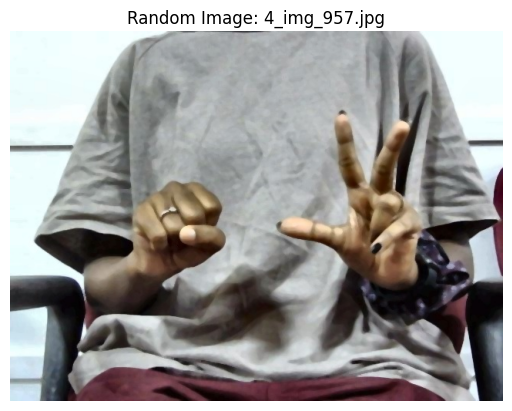

In [14]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Function to preview a random preprocessed image from random class
def preview_random_image(input_dir):
    # Get all image files in the directory
    image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.png'))]

    # Debugging: Check if any images are found
    if not image_files:
        print(f"No images found in '{input_dir}'. Check the directory contents.")
        return

    # Randomly select an image
    random_img = random.choice(image_files)
    img_path = os.path.join(input_dir, random_img)

    # Read and display the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Plot the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Random Image: {random_img}")
    plt.show()

# Example: Preview a random image from the preprocessed training dataset
preview_random_image(train_dir + "_preprocessed")


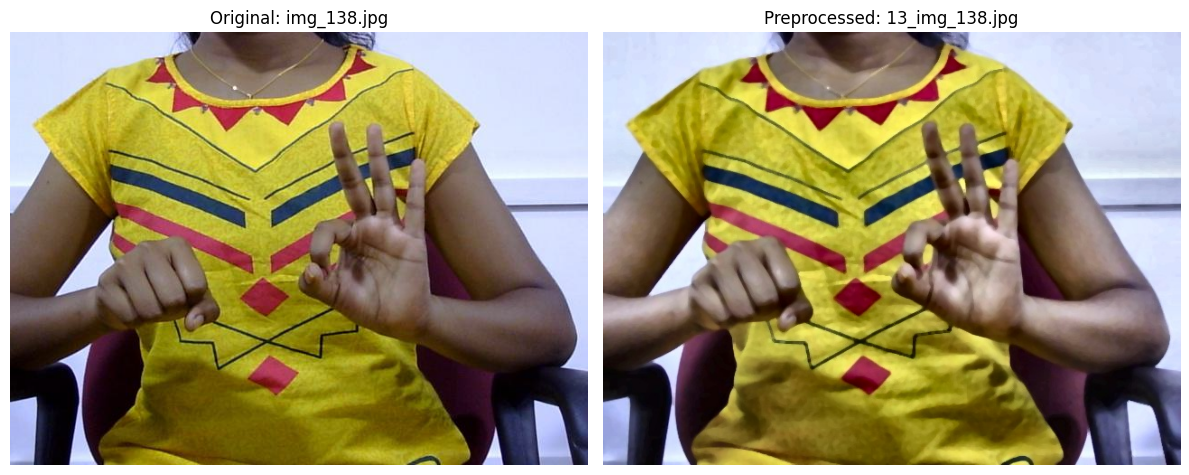

In [24]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Function to compare original and preprocessed images from a random class
def compare_random_image(original_dir, preprocessed_dir):
    # Loop through the class folders (1 to 13)
    class_folders = [str(folder) for folder in range(1, 14)]  # Folders 1 to 13
    
    # Pick a random class folder (1 to 13)
    random_class = random.choice(class_folders)
    class_folder = os.path.join(original_dir, random_class)
    
    # List all image files in the selected class folder
    image_files = [img for img in os.listdir(class_folder) if img.endswith(('.jpg', '.png'))]
    
    if not image_files:
        print(f"No images found in class folder '{random_class}'.")
        return
    
    # Pick a random image from the list
    random_image = random.choice(image_files)
    
    # Get the image paths for the original and preprocessed images
    original_image_path = os.path.join(class_folder, random_image)
    
    # Preprocessed images are stored in a subfolder inside 'train_preprocessed'
    preprocessed_image_path = os.path.join(preprocessed_dir, f"{random_class}_{random_image}")
    
    # Check if the images exist
    if not os.path.exists(original_image_path):
        print(f"Original image '{random_image}' not found in '{original_dir}'.")
        return
    
    if not os.path.exists(preprocessed_image_path):
        print(f"Preprocessed image '{random_class}_{random_image}' not found in '{preprocessed_dir}'.")
        return
    
    # Read the original and preprocessed images
    original_img = cv2.imread(original_image_path)
    preprocessed_img = cv2.imread(preprocessed_image_path)

    # Convert BGR to RGB for correct display using matplotlib
    original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    preprocessed_img_rgb = cv2.cvtColor(preprocessed_img, cv2.COLOR_BGR2RGB)

    # Create a side-by-side comparison plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(original_img_rgb)
    axes[0].axis('off')
    axes[0].set_title(f"Original: {random_image}")

    axes[1].imshow(preprocessed_img_rgb)
    axes[1].axis('off')
    axes[1].set_title(f"Preprocessed: {random_class}_{random_image}")

    plt.tight_layout()
    plt.show()

# Directories containing the original and preprocessed images
original_dir = r"D:\Inno Projects\Tamil Sign Language\Dataset"  # Directory containing the 1-13 folders
preprocessed_dir = r"D:\Inno Projects\Tamil Sign Language\Processed_Split\train_preprocessed"  # Preprocessed images directory

# Compare a random image
compare_random_image(original_dir, preprocessed_dir)


In [30]:
!pip install -U -r "D:/Inno Projects/Tamil Sign Language/yolov5/requirements.txt"

In [33]:
!pip install wandb

   ---------------------------------------- 0.0/19.5 MB ? eta -:--:--
   --- ------------------------------------ 1.6/19.5 MB 9.3 MB/s eta 0:00:02
   ------- -------------------------------- 3.7/19.5 MB 9.9 MB/s eta 0:00:02
   ------------- -------------------------- 6.6/19.5 MB 11.2 MB/s eta 0:00:02
   ------------------ --------------------- 9.2/19.5 MB 11.4 MB/s eta 0:00:01
   ------------------------ --------------- 11.8/19.5 MB 11.7 MB/s eta 0:00:01
   ----------------------------- ---------- 14.4/19.5 MB 11.8 MB/s eta 0:00:01
   ---------------------------------- ----- 16.8/19.5 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------  19.4/19.5 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 19.5/19.5 MB 11.6 MB/s eta 0:00:00


In [31]:
os.chdir('D:/Inno Projects/Tamil Sign Language/yolov5')  

In [44]:
import torch
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class TSLDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.classes = []  # Store unique class labels
        
        # Iterate over all files in the directory
        for filename in os.listdir(root_dir):
            if filename.endswith(('.jpg', '.png')):
                # Extract class label from the filename prefix (e.g., "1_img_001" -> class 1)
                class_label = int(filename.split('_')[0]) - 1  # Convert to 0-based index
                self.images.append(os.path.join(root_dir, filename))
                self.labels.append(class_label)
                # Add class to the class list if it's not already there
                if class_label not in self.classes:
                    self.classes.append(class_label)

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)
        
        if self.transform:
            image = self.transform(image)
        
        label = self.labels[idx]
        return image, label

# Dataset transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pre-trained mean and std
])

# Define dataset paths
train_dir = r"D:\Inno Projects\Tamil Sign Language\Processed_Split\train_preprocessed"
val_dir = r"D:\Inno Projects\Tamil Sign Language\Processed_Split\val_preprocessed"
test_dir = r"D:\Inno Projects\Tamil Sign Language\Processed_Split\test_preprocessed"

# Load the dataset using the custom TSLDataset
train_dataset = TSLDataset(train_dir, transform=transform)
val_dataset = TSLDataset(val_dir, transform=transform)
test_dataset = TSLDataset(test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [45]:
import torch.nn as nn
from torchvision import models

# Define the model with a backbone (VGG16, ResNet, InceptionV3)
class CustomModel(nn.Module):
    def __init__(self, backbone_name, num_classes):
        super(CustomModel, self).__init__()

        if backbone_name == "vgg16":
            backbone = models.vgg16(pretrained=True)
            self.features = backbone.features
            self.fc = nn.Sequential(
                nn.Flatten(),
                nn.Linear(25088, 1024),  # For VGG16
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(1024, num_classes)  # Multi-class output layer
            )
        
        elif backbone_name == "resnet":
            backbone = models.resnet18(pretrained=True)
            self.features = nn.Sequential(*list(backbone.children())[:-1])
            self.fc = nn.Sequential(
                nn.Flatten(),
                nn.Linear(512, 1024),  # For ResNet
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(1024, num_classes)  # Multi-class output layer
            )
        
        elif backbone_name == "inception_v3":
            backbone = models.inception_v3(pretrained=True, aux_logits=False)
            self.features = backbone.Conv2d_1a_3x3
            self.fc = nn.Sequential(
                nn.Flatten(),
                nn.Linear(2048, 1024),  # For InceptionV3
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(1024, num_classes)  # Multi-class output layer
            )
        
        else:
            raise ValueError("Backbone not supported")

    def forward(self, x):
        x = self.features(x)
        x = self.fc(x)
        return x


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Function to train a model
def train_model(model, train_loader, val_loader, epochs=10, lr=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        # Use tqdm to create a progress bar
        loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", ncols=100)

        for inputs, labels in loop:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Update the progress bar with the current loss
            loop.set_postfix(loss=running_loss/len(loop))  # Display the average loss so far

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader)}")

    return model

# Function to evaluate the model (get accuracy and confusion matrix)
def evaluate_model(model, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, cm

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


In [ ]:
# Get the number of classes
num_classes = len(train_dataset.classes)

# List of models to try
backbones = ["vgg16", "resnet", "inception_v3"]

for backbone_name in backbones:
    print(f"Training with backbone: {backbone_name}")
    
    # Initialize the model with the correct number of classes
    model = CustomModel(backbone_name, num_classes)

    # Train the model
    model = train_model(model, train_loader, val_loader)

    # Evaluate the model
    accuracy, cm = evaluate_model(model, test_loader)

    # Print results
    print(f"Accuracy for {backbone_name}: {accuracy * 100:.2f}%")
    plot_confusion_matrix(cm, test_dataset.classes)

    # Save the model weights for later use
    torch.save(model.state_dict(), f"{backbone_name}_model_weights.pth")


Training with backbone: vgg16


Epoch 1/10:  10%|███▋                                | 33/322 [11:45<1:50:01, 22.84s/it, loss=0.307]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Function to evaluate the model and plot confusion matrix
def evaluate_model_and_plot(model, test_loader, class_names):
    # Set the model to evaluation mode
    model.eval()

    all_preds = []
    all_labels = []

    # Turn off gradients for evaluation (saves memory and computations)
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Move inputs and labels to the same device as the model
            inputs, labels = inputs.to(device), labels.to(device)

            # Get predictions from the model
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Collect all predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot the confusion matrix
    plot_confusion_matrix(cm, class_names)

# Example of usage:
# Assuming `model` is your trained model, `test_loader` is the test DataLoader,
# and `train_dataset.classes` contains the class labels
evaluate_model_and_plot(model, test_loader, train_dataset.classes)
